# A/B Testing Analysis

In [949]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Try to import statsmodels for power analysis, use manual calculation if not available
try:
    from statsmodels.stats.power import ttest_power, solve_power
    STATSMODELS_AVAILABLE = True
except ImportError:
    STATSMODELS_AVAILABLE = False
    print("📝 Note: statsmodels not available. Using manual power calculations.")
    
# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


📝 Note: statsmodels not available. Using manual power calculations.


In [950]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Mohsu\Desktop\A-B testing Project 1\web_page_data.csv")
print("📊 Dataset Overview:")
print(f"Total sessions: {len(df)}")
print(f"Page A sessions: {len(df[df['Page'] == 'Page A'])}")
print(f"Page B sessions: {len(df[df['Page'] == 'Page B'])}")
print("\nFirst 10 rows:")
print(df.head(10))    


📊 Dataset Overview:
Total sessions: 36
Page A sessions: 21
Page B sessions: 15

First 10 rows:
     Page  Time
0  Page A  0.21
1  Page B  2.53
2  Page A  0.35
3  Page B  0.71
4  Page A  0.67
5  Page B  0.85
6  Page A  2.11
7  Page B  2.46
8  Page A  1.32
9  Page B  1.49


In [951]:
# Convert time to seconds for better interpretation
df['Time'] = df["Time"] * 60 # Convert to milliseconds

#check the data after conversion
print("\n📊 Data after conversion to seconds:")
print(df.head(10))    



📊 Data after conversion to seconds:
     Page   Time
0  Page A   12.6
1  Page B  151.8
2  Page A   21.0
3  Page B   42.6
4  Page A   40.2
5  Page B   51.0
6  Page A  126.6
7  Page B  147.6
8  Page A   79.2
9  Page B   89.4


In [952]:
print("\n" + "="*60)
print("📈 EXPLORATORY DATA ANALYSIS")
print("="*60)
# Separate data by page
page_a = df[df['Page'] == 'Page A']['Time']
page_b = df[df['Page'] == 'Page B']['Time']



📈 EXPLORATORY DATA ANALYSIS


In [953]:
# Descriptive statistics
def calculate_stats(data, name):
    stats_dict = {
        'Group': name,
        'Count': len(data),
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Std Dev': np.std(data, ddof=1),
        'Min': np.min(data),
        'Max': np.max(data),
        'Q1': np.percentile(data, 25),
        'Q3': np.percentile(data, 75)
    }
    return stats_dict

stats_a = calculate_stats(page_a, 'Page A')
stats_b = calculate_stats(page_b, 'Page B')


In [954]:
# Create summary table
summary_df = pd.DataFrame([stats_a, stats_b])
print("\n📊 Descriptive Statistics Summary:")
print(summary_df.round(2))


📊 Descriptive Statistics Summary:
    Group  Count  Mean  Median  Std Dev   Min    Max    Q1     Q3
0  Page A     21  75.8    57.0    53.08  12.6  205.2  40.2  103.8
1  Page B     15  97.2    88.2    60.68  25.8  214.2  48.0  140.7


In [955]:
# Calculate key metrics
mean_diff = stats_b['Mean'] - stats_a['Mean']
percent_diff = (mean_diff / stats_a['Mean']) * 100

print(f"\n🎯 Key Insights:")
print(f"• Page B average time: {stats_b['Mean']:.1f} seconds")
print(f"• Page A average time: {stats_a['Mean']:.1f} seconds")
print(f"• Absolute difference: {mean_diff:.1f} seconds")
print(f"• Percentage difference: {percent_diff:.1f}%")


🎯 Key Insights:
• Page B average time: 97.2 seconds
• Page A average time: 75.8 seconds
• Absolute difference: 21.4 seconds
• Percentage difference: 28.2%



📊 DATA VISUALIZATION


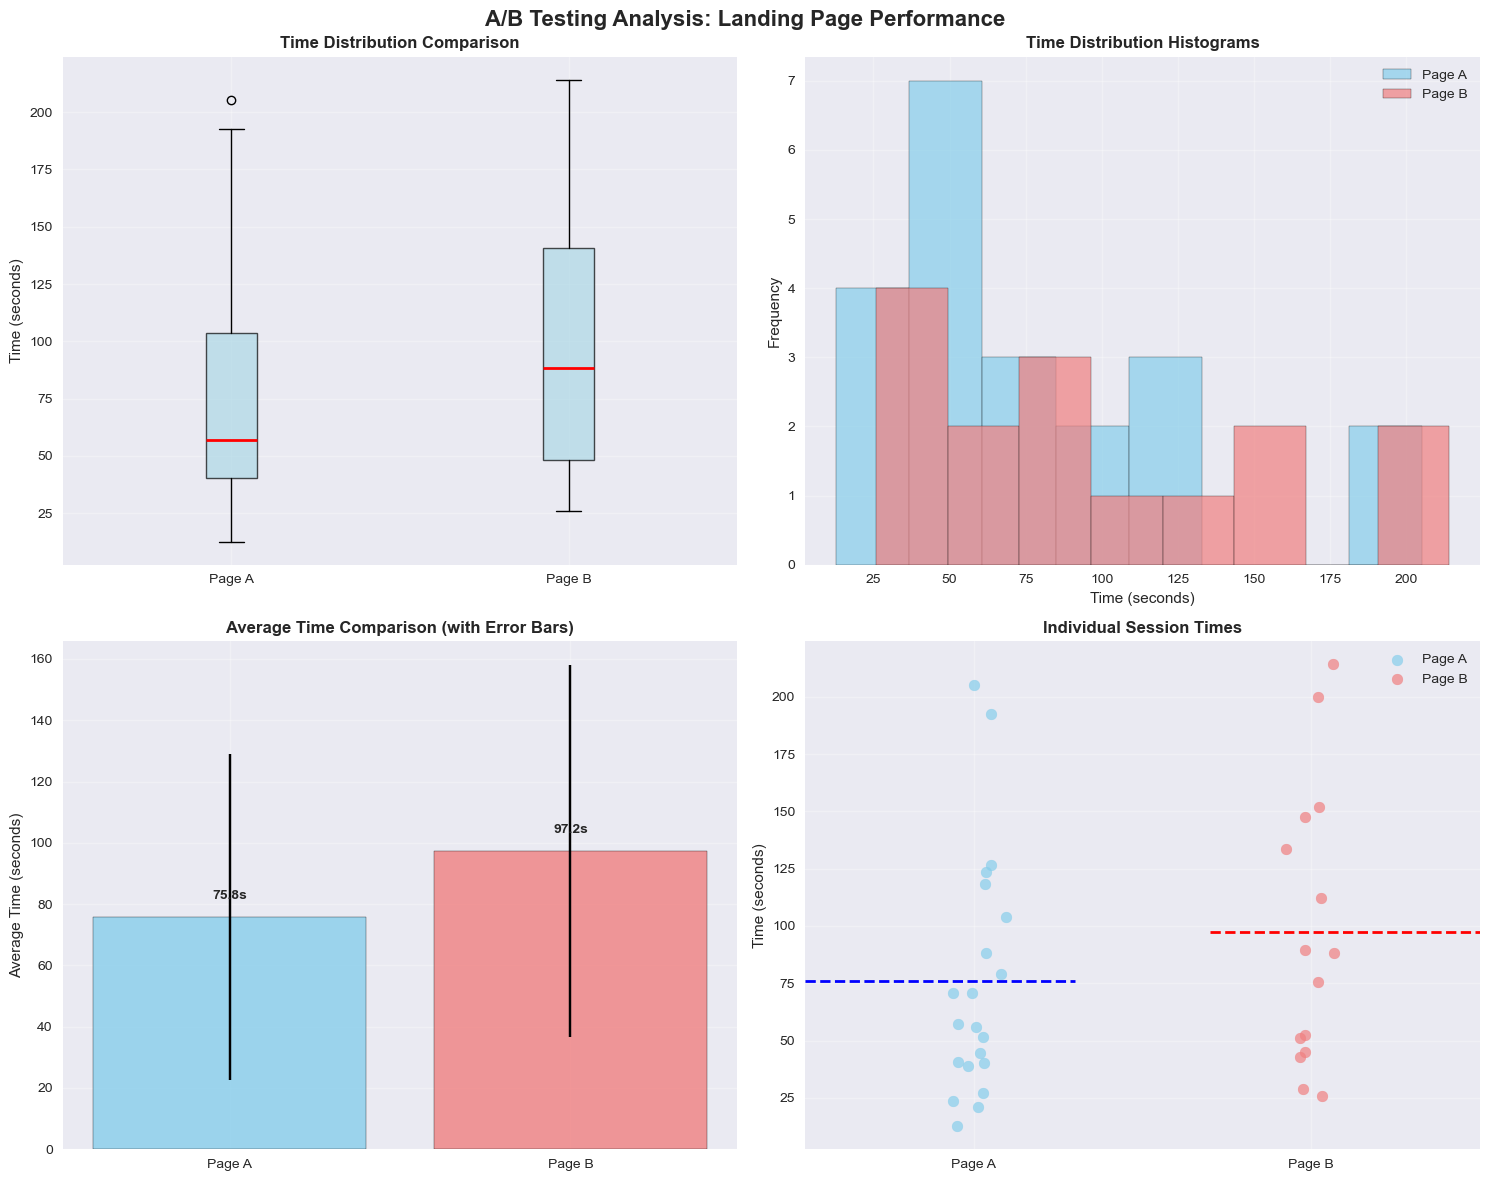

In [956]:
print("\n" + "="*60)
print("📊 DATA VISUALIZATION")
print("="*60)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('A/B Testing Analysis: Landing Page Performance', fontsize=16, fontweight='bold')
# 1. Box Plot Comparison
axes[0, 0].boxplot([page_a, page_b], labels=['Page A', 'Page B'], patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 0].set_title('Time Distribution Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Time (seconds)')
axes[0, 0].grid(True, alpha=0.3)
# 2. Histogram Comparison
axes[0, 1].hist(page_a, bins=8, alpha=0.7, label='Page A', color='skyblue', edgecolor='black')
axes[0, 1].hist(page_b, bins=8, alpha=0.7, label='Page B', color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Time Distribution Histograms', fontweight='bold')
axes[0, 1].set_xlabel('Time (seconds)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
# 3. Mean Comparison Bar Chart
pages = ['Page A', 'Page B']
means = [stats_a['Mean'], stats_b['Mean']]
stds = [stats_a['Std Dev'], stats_b['Std Dev']]

bars = axes[1, 0].bar(pages, means, yerr=stds, capsize=5, 
                      color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Average Time Comparison (with Error Bars)', fontweight='bold')
axes[1, 0].set_ylabel('Average Time (seconds)')
axes[1, 0].grid(True, alpha=0.3)
# Add value labels on bars
for bar, mean in zip(bars, means):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                    f'{mean:.1f}s', ha='center', va='bottom', fontweight='bold')
    
# 4. Scatter Plot with Trend
x_a = np.ones(len(page_a)) + np.random.normal(0, 0.05, len(page_a))
x_b = np.ones(len(page_b)) * 2 + np.random.normal(0, 0.05, len(page_b))

axes[1, 1].scatter(x_a, page_a, alpha=0.7, s=60, color='skyblue', label='Page A')
axes[1, 1].scatter(x_b, page_b, alpha=0.7, s=60, color='lightcoral', label='Page B')
axes[1, 1].set_xlim(0.5, 2.5)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Page A', 'Page B'])
axes[1, 1].set_title('Individual Session Times', fontweight='bold')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Add mean lines
axes[1, 1].axhline(y=stats_a['Mean'], xmin=0, xmax=0.4, color='blue', linestyle='--', linewidth=2)
axes[1, 1].axhline(y=stats_b['Mean'], xmin=0.6, xmax=1, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


In [957]:
print("\n" + "="*60)
print("🔬 STATISTICAL ANALYSIS")
print("="*60)

# Assumption Testing
print("🧪 Testing Assumptions:")


🔬 STATISTICAL ANALYSIS
🧪 Testing Assumptions:


In [958]:
# Assumption Testing
print("🧪 Testing Assumptions:")

# 1. Normality Test
shapiro_a = stats.shapiro(page_a)
shapiro_b = stats.shapiro(page_b)

print(f"\nNormality Tests (Shapiro-Wilk):")
print(f"• Page A: p-value = {shapiro_a.pvalue:.4f}")
print(f"• Page B: p-value = {shapiro_b.pvalue:.4f}")

if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    print("✅ Both groups appear normally distributed")
else:
    print("⚠️  At least one group may not be normally distributed")

🧪 Testing Assumptions:

Normality Tests (Shapiro-Wilk):
• Page A: p-value = 0.0175
• Page B: p-value = 0.1612
⚠️  At least one group may not be normally distributed


In [959]:
# 2. Equal Variance Test
levene_stat, levene_p = stats.levene(page_a, page_b)
print(f"\nEqual Variance Test (Levene's):")
print(f"• p-value = {levene_p:.4f}")

if levene_p > 0.05:
    print("✅ Equal variances assumed")
    equal_var = True
else:
    print("⚠️  Unequal variances - using Welch's t-test")
    equal_var = False


Equal Variance Test (Levene's):
• p-value = 0.4725
✅ Equal variances assumed


In [960]:
# Two-Sample T-Test
print(f"\n🎯 Hypothesis Testing:")
print(f"H₀: μ_B - μ_A = 0 (no difference)")
print(f"H₁: μ_B - μ_A > 0 (Page B has higher engagement)")
print(f"α = 0.05")

t_stat, p_value = stats.ttest_ind(page_b, page_a, equal_var=equal_var, alternative='greater')

print(f"\n📊 Test Results:")
print(f"• t-statistic: {t_stat:.4f}")
print(f"• p-value: {p_value:.4f}")
print(f"• Degrees of freedom: {len(page_a) + len(page_b) - 2}")


🎯 Hypothesis Testing:
H₀: μ_B - μ_A = 0 (no difference)
H₁: μ_B - μ_A > 0 (Page B has higher engagement)
α = 0.05

📊 Test Results:
• t-statistic: 1.1237
• p-value: 0.1345
• Degrees of freedom: 34


In [961]:
# Decision
alpha = 0.05
if p_value < alpha:
    print(f"✅ REJECT H₀: Statistically significant difference (p < {alpha})")
    decision = "significant"
else:
    print(f"❌ FAIL TO REJECT H₀: No statistically significant difference (p ≥ {alpha})")
    decision = "not significant"


❌ FAIL TO REJECT H₀: No statistically significant difference (p ≥ 0.05)


In [962]:
# Effect Size (Cohen's d)
pooled_std = np.sqrt(((len(page_a) - 1) * np.var(page_a, ddof=1) + 
                      (len(page_b) - 1) * np.var(page_b, ddof=1)) / 
                     (len(page_a) + len(page_b) - 2))
cohens_d = (np.mean(page_b) - np.mean(page_a)) / pooled_std

print(f"\n📏 Effect Size:")
print(f"• Cohen's d: {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_size = "small"
elif abs(cohens_d) < 0.5:
    effect_size = "small to medium"
elif abs(cohens_d) < 0.8:
    effect_size = "medium to large"
else:
    effect_size = "large"

print(f"• Effect size interpretation: {effect_size}")


📏 Effect Size:
• Cohen's d: 0.3799
• Effect size interpretation: small to medium


In [963]:
# Confidence Interval
from scipy.stats import t

# 95% CI for difference in means
diff_mean = np.mean(page_b) - np.mean(page_a)
se_diff = np.sqrt(np.var(page_a, ddof=1)/len(page_a) + np.var(page_b, ddof=1)/len(page_b))
df = len(page_a) + len(page_b) - 2
t_critical = t.ppf(0.975, df)
margin_error = t_critical * se_diff

ci_lower = diff_mean - margin_error
ci_upper = diff_mean + margin_error

print(f"\n📊 95% Confidence Interval for Difference:")
print(f"• Difference: {diff_mean:.2f} seconds")
print(f"• 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}] seconds")


📊 95% Confidence Interval for Difference:
• Difference: 21.40 seconds
• 95% CI: [-18.20, 61.00] seconds


In [964]:
# Power Analysis
try:
    from statsmodels.stats.power import ttest_power
    
    # Calculate observed power
    effect_size_std = cohens_d
    n1, n2 = len(page_a), len(page_b)
    
    # For unequal sample sizes, use harmonic mean
    n_harmonic = 2 * n1 * n2 / (n1 + n2)
    power = ttest_power(effect_size_std, n_harmonic, alpha, alternative='two-sided')
    
    print(f"\n⚡ Power Analysis:")
    print(f"• Observed power: {power:.3f}")
    
    if power < 0.8:
        print("⚠️  Low statistical power - results should be interpreted cautiously")
    else:
        print("✅ Adequate statistical power")

    
    # Calculate required sample size for 80% power
    from statsmodels.stats.power import solve_power
    required_n = solve_power(effect_size=cohens_d, power=0.8, alpha=alpha, alternative='two-sided')
    print(f"• Required sample size per group for 80% power: {int(np.ceil(required_n))}")

except ImportError:
    print("\n⚡ Power Analysis (Manual Calculation):")


⚡ Power Analysis:
• Observed power: 0.322
⚠️  Low statistical power - results should be interpreted cautiously

⚡ Power Analysis (Manual Calculation):


In [965]:
# Manual power calculation using normal approximation
from scipy.stats import norm
    
 # Calculate pooled standard error
se_pooled = np.sqrt(2 * (pooled_std**2) / ((len(page_a) + len(page_b)) / 2))
    
# Calculate power using normal approximation
critical_value = norm.ppf(1 - alpha/2)
observed_effect = abs(np.mean(page_b) - np.mean(page_a))
power_approx = 1 - norm.cdf(critical_value - observed_effect/se_pooled) + norm.cdf(-critical_value - observed_effect/se_pooled)
    
print(f"• Estimated power: {power_approx:.3f}")
    
if power_approx < 0.8:
        print("⚠️  Low statistical power - results should be interpreted cautiously")
else:
        print("✅ Adequate statistical power")
    
    # Rough sample size estimate
z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(0.8)  # 80% power
required_n_approx = 2 * ((z_alpha + z_beta) / cohens_d)**2
print(f"• Estimated required sample size per group for 80% power: {int(np.ceil(required_n_approx))}")


• Estimated power: 0.207
⚠️  Low statistical power - results should be interpreted cautiously
• Estimated required sample size per group for 80% power: 109


In [966]:
print("\n" + "="*60)
print("💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

print(f"\n🎯 Key Findings:")
print(f"1. Page B shows {percent_diff:.1f}% higher average engagement")
print(f"2. Average time difference: {diff_mean:.1f} seconds")
print(f"3. Statistical significance: {decision}")
print(f"4. Effect size: {effect_size}")

print(f"\n💡 Business Interpretation:")
if p_value < alpha:
    print("✅ RECOMMENDATION: Deploy Page B")
    print("• Statistically significant improvement in user engagement")
    print("• Higher engagement likely indicates better sales potential")
    print("• Consider monitoring conversion rates to validate proxy metric")
else:
    print("⚠️  RECOMMENDATION: Inconclusive - Consider larger sample size")
    print("• While Page B shows numerically higher engagement, the difference")
    print("  is not statistically significant with current sample size")
    print("• Effect size suggests there may be a real difference")
    print("• Consider running a larger test or collecting more data")


💼 BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 Key Findings:
1. Page B shows 28.2% higher average engagement
2. Average time difference: 21.4 seconds
3. Statistical significance: not significant
4. Effect size: small to medium

💡 Business Interpretation:
⚠️  RECOMMENDATION: Inconclusive - Consider larger sample size
• While Page B shows numerically higher engagement, the difference
  is not statistically significant with current sample size
• Effect size suggests there may be a real difference
• Consider running a larger test or collecting more data


In [967]:
# Sample size calculation for future tests
print(f"\n📈 Future Test Recommendations:")
try:
    from statsmodels.stats.power import solve_power
    desired_power = 0.8
    required_n = solve_power(effect_size=cohens_d, power=desired_power, alpha=alpha, alternative='two-sided')
    print(f"• For 80% power to detect observed effect: ~{int(np.ceil(required_n))} sessions per group")
except ImportError:
# Manual calculation if statsmodels not available
    from scipy.stats import norm
    z_alpha = norm.ppf(1 - alpha/2)
    z_beta = norm.ppf(0.8)
    required_n_manual = 2 * ((z_alpha + z_beta) / cohens_d)**2
    print(f"• For 80% power to detect observed effect: ~{int(np.ceil(required_n_manual))} sessions per group")

print(f"• Current test provides limited power due to small sample size")

print(f"\n🔍 Limitations:")
print("• Small sample size limits statistical power")
print("• Time-on-page is a proxy metric - direct conversion tracking preferred")
print("• Assumes equal traffic allocation would be maintained")
print("• External factors (seasonality, marketing campaigns) not controlled")

print(f"\n✅ Next Steps:")
print("1. If deploying Page B: Monitor actual conversion rates")
print("2. If running larger test: Use calculated sample size")
print("3. Consider A/A testing to validate measurement system")
print("4. Document learnings for future optimization efforts")


📈 Future Test Recommendations:
• For 80% power to detect observed effect: ~109 sessions per group
• Current test provides limited power due to small sample size

🔍 Limitations:
• Small sample size limits statistical power
• Time-on-page is a proxy metric - direct conversion tracking preferred
• Assumes equal traffic allocation would be maintained
• External factors (seasonality, marketing campaigns) not controlled

✅ Next Steps:
1. If deploying Page B: Monitor actual conversion rates
2. If running larger test: Use calculated sample size
3. Consider A/A testing to validate measurement system
4. Document learnings for future optimization efforts


In [968]:
print("\n" + "="*60)
print("💾 SAVING RESULTS")
print("="*60)

# Save summary results
results_summary = {
    'Metric': ['Sample Size A', 'Sample Size B', 'Mean Time A (sec)', 'Mean Time B (sec)',
               'Difference (sec)', 'Percentage Difference (%)', 't-statistic', 'p-value',
               'Cohens d', 'Statistical Significance', 'Effect Size', 'Power'],
    'Value': [len(page_a), len(page_b), f"{stats_a['Mean']:.2f}", f"{stats_b['Mean']:.2f}",
              f"{diff_mean:.2f}", f"{percent_diff:.1f}%", f"{t_stat:.4f}", f"{p_value:.4f}",
              f"{cohens_d:.4f}", decision, effect_size, "See power analysis above"]
}

results_df = pd.DataFrame(results_summary)
print("📊 Results Summary:")
print(results_df.to_string(index=False))

print(f"\n🎉 Analysis Complete!")
print(f"This analysis demonstrates:")
print(f"• Statistical hypothesis testing methodology")
print(f"• Effect size calculation and interpretation")
print(f"• Power analysis for sample size planning")
print(f"• Business-focused recommendations")
print(f"• Professional data visualization")



💾 SAVING RESULTS
📊 Results Summary:
                   Metric                    Value
            Sample Size A                       21
            Sample Size B                       15
        Mean Time A (sec)                    75.80
        Mean Time B (sec)                    97.20
         Difference (sec)                    21.40
Percentage Difference (%)                    28.2%
              t-statistic                   1.1237
                  p-value                   0.1345
                 Cohens d                   0.3799
 Statistical Significance          not significant
              Effect Size          small to medium
                    Power See power analysis above

🎉 Analysis Complete!
This analysis demonstrates:
• Statistical hypothesis testing methodology
• Effect size calculation and interpretation
• Power analysis for sample size planning
• Business-focused recommendations
• Professional data visualization
